In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
#Selecting all 4 features except 'species' for making cluster
x=df.iloc[:,[0,1,2,3]].values

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

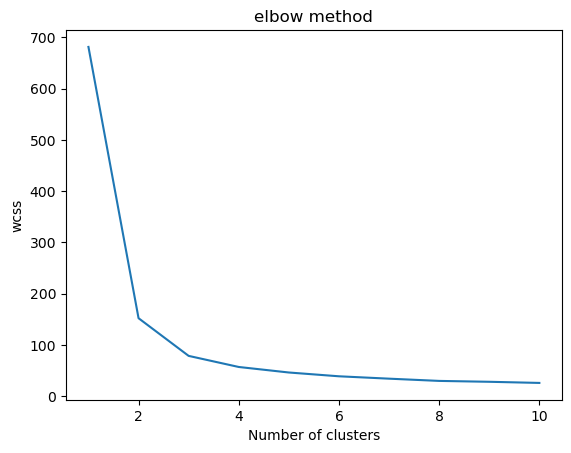

In [7]:
#Using 'Elbow-method' to find best suitable number of cluster
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
# As in above image it can be seen that the most abrupt change is seen on number of clusters = 3 
#Hence n_cluster (no. of cluster) = 3
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=3)

In [9]:
y=kmeans.predict(x)

In [10]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

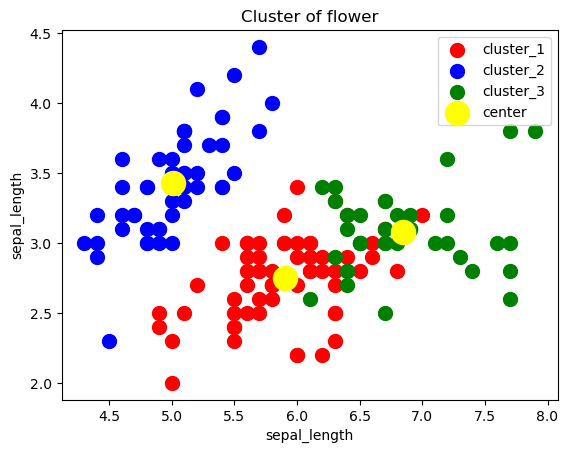

In [11]:
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='red',label='cluster_1')
plt.scatter(x[y==1,0],x[y==1,1],s=100,c='blue',label='cluster_2')
plt.scatter(x[y==2,0],x[y==2,1],s=100,c='green',label='cluster_3')
            
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='center')

plt.title('Cluster of flower')
plt.xlabel('sepal_length')
plt.ylabel('sepal_length')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import silhouette_samples,silhouette_score
sl_avg=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,init='k-means++')
    label=model.fit_predict(x)
    sil_avg=silhouette_score(x,label)
    sl_avg.append(sil_avg)

In [13]:
sl_avg

[0.6810461692117467,
 0.5528190123564102,
 0.49805050499728803,
 0.48874888709310654,
 0.36748457480983177,
 0.3566882476581706,
 0.34873453772194013,
 0.32508071781022835]

In [14]:
import numpy as np
np.mean(sl_avg)

0.45233158145734026